<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/notebook/Ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-2 評估機器學習模型

## 4-2-1 把資料分成訓練集、驗證集和測試集

### 程式 4.1 簡單拆分驗證

In [ ]:
num_validation_samples = 10000 #設定預計的驗證資料數據筆數：10000 筆

np.random.shuffle(data) #打散資料，重新洗牌

validation_data = data[:num_validation_samples]  #定義前 10000 筆(0~9999)為驗證集
data = data[num_validation_samples:]  #定義第 10000 筆後(10000~)為訓練集

training_data = data[:]  

model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)  #以訓練集資料進行模型訓練，並以驗證集資料進行模型評估

#對模型進行調整，再進行訓練與評估

model = get_model()
model.train(np.concatenate([training_data,
                            validation_data])) #當完成超參數的調整後，通常會從頭再用所有資料 (訓練集+驗證集) 來訓練一次
test_score = model.evaluate(test_data)

NameError: ignored

### 程式 4.2 K 折交叉驗證 (此處 K = 4)

In [ ]:
k = 4  #設定 4 個區塊
num_validation_samples = len(data) // k #將資料筆數除以區塊數(此例為 4)

np.random.shuffle(data)

validation_scores = []
for fold in range(k):
    validation_data = data[num_validation_samples * fold:\
                           num_validation_samples * (fold + 1)]  #選擇驗證資料區塊
    training_data = data[:num_validation_samples * fold] + \
                         data[num_validation_samples * (fold + 1):]  #使用剩餘的資料做為訓練資料，注意到+運算子是指串列(list)的連接，而不是加總

    model = get_model()  #建立一個全新的模型(未經訓練)
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)
    validation_score = np.average(validation_scores)  #驗證分數：k 折驗證分數的平均值
    
    model = get_model()
    model.train(data)
    test_score = model.evaluate(test_data)  #以所有可用的非測試資料訓練最終模型

# 4-3 資料預處理 (preprocessing)、特徵工程 (feature engineering) 和特徵學習 (feature learning)

## 4-3-1 神經網路的資料預處理 (preprocessing)

In [ ]:
x -= x.mean(axis=0)
x /= x.std(axis=0)

# 4-4 過度配適 (overfitting) 和低度配適 (underfitting)

In [ ]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


## 4-4-1 減少神經網路的大小

### 程式 4.3 原始模型

In [ ]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))  #原始的為 16 個單元
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


### 程式 4.4 容量較低的模型版本

In [ ]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))  #改成容量較低的 4 個單元
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [ ]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 182us/step - loss: 0.4440 - acc: 0.8247 - val_loss: 0.3289 - val_acc: 0.8833
Epoch 2/20
25000/25000 [==============================] - 4s 151us/step - loss: 0.2574 - acc: 0.9079 - val_loss: 0.2860 - val_acc: 0.8883
Epoch 3/20
25000/25000 [==============================] - 4s 151us/step - loss: 0.1993 - acc: 0.9288 - val_loss: 0.2821 - val_acc: 0.8886
Epoch 4/20
25000/25000 [==============================] - 4s 152us/step - loss: 0.1667 - acc: 0.9410 - val_loss: 0.2938 - val_acc: 0.8844
Epoch 5/20
25000/25000 [==============================] - 4s 152us/step - loss: 0.1435 - acc: 0.9499 - val_loss: 0.3115 - val_acc: 0.8806
Epoch 6/20
25000/25000 [==============================] - 4s 152us/step - loss: 0.1258 - acc: 0.9557 - val_loss: 0.3476 - val_acc: 0.8722
Epoch 7/20
25000/25000 [==============================] - 4s 152us/step - 

In [ ]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 167us/step - loss: 0.5805 - acc: 0.7020 - val_loss: 0.5307 - val_acc: 0.7576
Epoch 2/20
25000/25000 [==============================] - 3s 140us/step - loss: 0.4843 - acc: 0.8454 - val_loss: 0.4869 - val_acc: 0.8310
Epoch 3/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.4389 - acc: 0.8920 - val_loss: 0.4662 - val_acc: 0.8505
Epoch 4/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.4077 - acc: 0.9165 - val_loss: 0.4537 - val_acc: 0.8635
Epoch 5/20
25000/25000 [==============================] - 3s 134us/step - loss: 0.3830 - acc: 0.9311 - val_loss: 0.4518 - val_acc: 0.8618
Epoch 6/20
25000/25000 [==============================] - 3s 134us/step - loss: 0.3619 - acc: 0.9417 - val_loss: 0.4420 - val_acc: 0.8729
Epoch 7/20
25000/25000 [==============================] - 3s 133us/step - loss: 0.3424 - acc: 0.9513 - val_loss: 0.4455 - 

In [ ]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

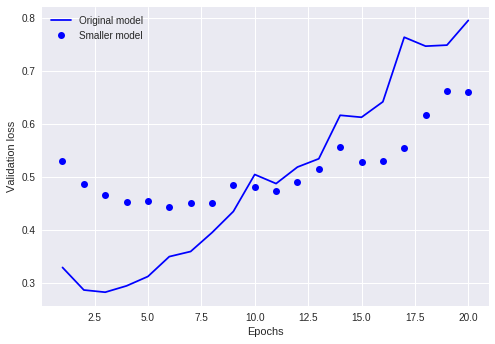

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b-', label='Original model')

plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### 程式 4.5 具有更高容量的模型版本

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))  #改以更高容量的 512 個輸出單位
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 20s 805us/step - loss: 0.4666 - acc: 0.7962 - val_loss: 0.2842 - val_acc: 0.8852
Epoch 2/20
25000/25000 [==============================] - 20s 786us/step - loss: 0.2244 - acc: 0.9109 - val_loss: 0.3014 - val_acc: 0.8737
Epoch 3/20
25000/25000 [==============================] - 19s 779us/step - loss: 0.1334 - acc: 0.9516 - val_loss: 0.4334 - val_acc: 0.8397
Epoch 4/20
25000/25000 [==============================] - 20s 787us/step - loss: 0.0712 - acc: 0.9796 - val_loss: 0.4167 - val_acc: 0.8828
Epoch 5/20
25000/25000 [==============================] - 20s 786us/step - loss: 0.0842 - acc: 0.9855 - val_loss: 0.4877 - val_acc: 0.8836
Epoch 6/20
25000/25000 [==============================] - 20s 794us/step - loss: 0.0694 - acc: 0.9882 - val_loss: 0.4793 - val_acc: 0.8794
Epoch 7/20
25000/25000 [==============================] - 19s 775us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.

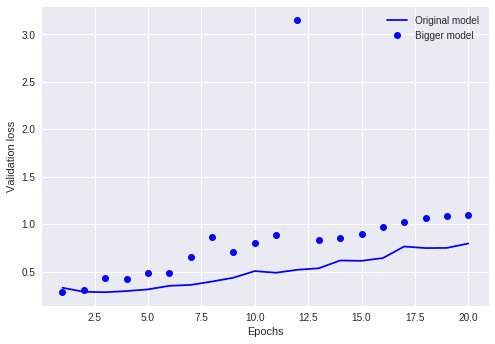

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

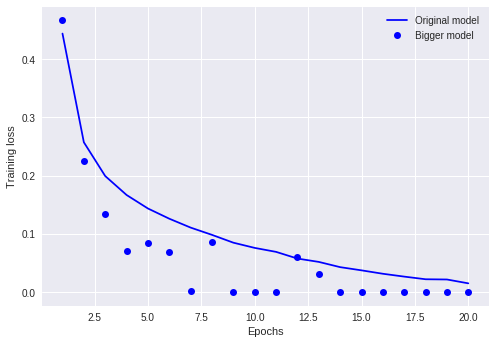

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

### 程式 4.6 將 L2 權常規化增加到模型中

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),  #加入 L2 權重常規化並將學習率設為 0.001 
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 201us/step - loss: 0.4901 - acc: 0.8145 - val_loss: 0.3900 - val_acc: 0.8656
Epoch 2/20
25000/25000 [==============================] - 4s 171us/step - loss: 0.3106 - acc: 0.9058 - val_loss: 0.3303 - val_acc: 0.8891
Epoch 3/20
25000/25000 [==============================] - 4s 169us/step - loss: 0.2649 - acc: 0.9201 - val_loss: 0.3308 - val_acc: 0.8870
Epoch 4/20
25000/25000 [==============================] - 4s 171us/step - loss: 0.2450 - acc: 0.9290 - val_loss: 0.3406 - val_acc: 0.8823
Epoch 5/20
25000/25000 [==============================] - 4s 172us/step - loss: 0.2312 - acc: 0.9351 - val_loss: 0.3802 - val_acc: 0.8685
Epoch 6/20
25000/25000 [==============================] - 4s 167us/step - loss: 0.2225 - acc: 0.9394 - val_loss: 0.3659 - val_acc: 0.8758
Epoch 7/20
25000/25000 [==============================] - 4s 170us/step - loss: 0.2156 - acc: 0.9417 - val_loss: 0.3767 - 

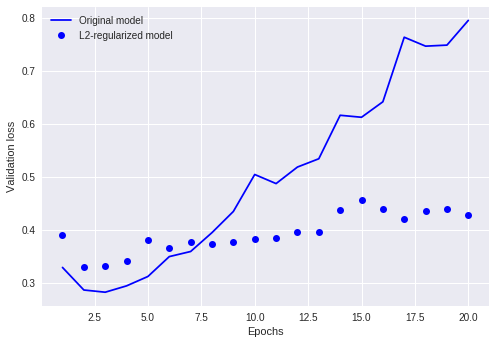

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### 程式 4.7 Keras 提供不同的權重常規化

In [ ]:
from keras import regularizers

regularizers.l1(0.001)  #L1 常規化

regularizers.l1_l2(l1=0.001, l2=0.001)  #同時使用 L1 及 L2 常規化

In [ ]:
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)

In [ ]:
layer_output *= 0.5

In [ ]:
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
layer_output /= 0.5

In [ ]:
model.add(layers.Dropout(0.5))

### 程式 4.8 將 Dropout 層添加到 IMDB 神經網路

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 193us/step - loss: 0.5910 - acc: 0.6834 - val_loss: 0.4335 - val_acc: 0.8614
Epoch 2/20
25000/25000 [==============================] - 4s 178us/step - loss: 0.4364 - acc: 0.8179 - val_loss: 0.3487 - val_acc: 0.8705
Epoch 3/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.3481 - acc: 0.8714 - val_loss: 0.2923 - val_acc: 0.8857
Epoch 4/20
25000/25000 [==============================] - 4s 170us/step - loss: 0.2896 - acc: 0.8982 - val_loss: 0.2765 - val_acc: 0.8878
Epoch 5/20
25000/25000 [==============================] - 4s 173us/step - loss: 0.2560 - acc: 0.9124 - val_loss: 0.2803 - val_acc: 0.8885
Epoch 6/20
25000/25000 [==============================] - 4s 175us/step - loss: 0.2254 - acc: 0.9248 - val_loss: 0.2877 - val_acc: 0.8874
Epoch 7/20
25000/25000 [==============================] - 4s 175us/step - loss: 0.2004 - acc: 0.9338 - val_loss: 0.3194 - 

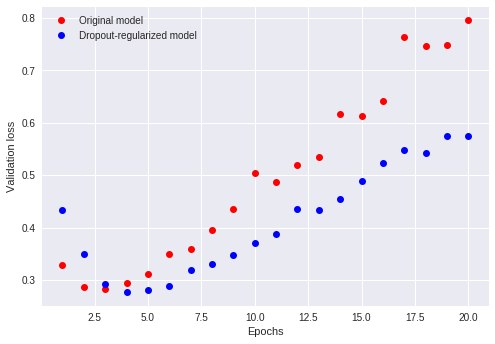

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()